In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import os

In [3]:
#data files
ca_largest_fires = 'Resources/top_20_CA_wildfires.csv'
top_20_acres = 'Resources/top20_acres.csv'

# read CA fire perimeters 
ca_largest_fires = pd.read_csv(ca_largest_fires)
top_20_acres = pd.read_csv(top_20_acres)

#create DataFrame
top_20_fires_df = pd.DataFrame(ca_largest_fires)
top_20_fires_df.head(20)

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
7,Matilija,Undetermined,September,1932,Ventura,220000,0,0
8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2


In [4]:
#dataframe including 2020
top_20_acres_df = pd.DataFrame(top_20_acres)
top_20_acres_df.head(20)

,fire name,cause,month,year,county,acres,structures,deaths
0,AUGUST COMPLEX,Under Investigation,August,2020,"Mendocino, Humboldt, Trinity,\nTehama, Glenn, ...",1032649,935,1
1,MENDOCINO COMPLEX,Under Investigation,July,2018,"Colusa, Lake, Mendocino & Glenn",459123,280,1
2,SCU LIGHTNING COMPLEX,Under Investigation,August,2020,"Stanislaus, Santa Clara, Alameda, Contra Costa...",396624,222,0
3,CREEK FIRE,Under Investigation,September,2020,Fresno & Madera,377693,853,0
4,LNU LIGHTNING COMPLEX,Under Investigation,August,2020,"Sonoma, Lake, Napa, Yolo & Solano",363220,1491,6
5,NORTH COMPLEX,Under Investigation,August,2020,"Butte, Plumas & Yuba",318930,2352,15
6,THOMAS,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
7,CEDAR,Human Related,October,2003,San Diego,273246,2820,15
8,RUSH,Lightning,August,2012,Lassen,315577,0,0
9,RIM,Human Related,August,2013,Tuolumne,257314,112,0


In [5]:
grouped_top_20 = top_20_acres_df.groupby(['year'])['acres'].sum().reset_index()
grouped_top_20

,year,acres
0,1932,220000
1,1970,175425
2,1977,177866
3,2003,273246
4,2006,162702
5,2007,438197
6,2008,354856
7,2012,315577
8,2013,257314
9,2017,281893


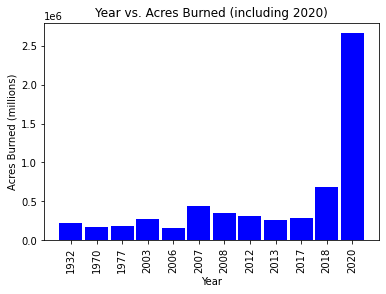

In [26]:
x_axis = grouped_top_20['year'].astype(str)
y_axis = grouped_top_20['acres']

# making a bar chart
plt.bar(x_axis, y_axis, width=0.90, color='blue')
plt.xticks(rotation=90)


# giving the name to the x and y label
plt.title('Year vs. Acres Burned (including 2020)')
plt.xlabel('Year')
plt.ylabel('Acres Burned (millions)')
plt.savefig('top_20_years_vs_acresburned_all.png')

In [29]:
largest_fires = top_20_fires_df.groupby(['year'])['acres'].sum().reset_index()
largest_fires

,year,acres
0,1932,220000
1,1970,175425
2,1977,177866
3,1987,145980
4,1999,140948
5,2002,150696
6,2003,273246
7,2006,162702
8,2007,438197
9,2008,354856


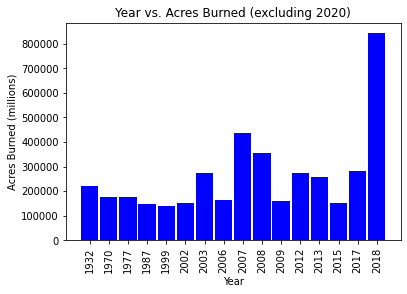

In [31]:
x_axis = largest_fires['year'].astype(str)
y_axis = largest_fires['acres']

# making a bar chart
plt.bar(x_axis, y_axis, width=0.90, color='blue')
plt.xticks(rotation=90)


# giving the name to the x and y label
plt.title('Year vs. Acres Burned (excluding 2020)')
plt.xlabel('Year')
plt.ylabel('Acres Burned (millions)')
plt.savefig('years_vs_acresburned_all.png')

In [13]:
worst_year = top_20_acres_df.loc[top_20_acres_df['year'] == 2020]
worst_year

,fire name,cause,month,year,county,acres,structures,deaths
0,AUGUST COMPLEX,Under Investigation,August,2020,"Mendocino, Humboldt, Trinity,\nTehama, Glenn, ...",1032649,935,1
2,SCU LIGHTNING COMPLEX,Under Investigation,August,2020,"Stanislaus, Santa Clara, Alameda, Contra Costa...",396624,222,0
3,CREEK FIRE,Under Investigation,September,2020,Fresno & Madera,377693,853,0
4,LNU LIGHTNING COMPLEX,Under Investigation,August,2020,"Sonoma, Lake, Napa, Yolo & Solano",363220,1491,6
5,NORTH COMPLEX,Under Investigation,August,2020,"Butte, Plumas & Yuba",318930,2352,15
17,SQF COMPLEX,Lightning,August,2020,Tulare,170384,228,0


In [9]:
#filter for past 30 years
past_30_years = top_20_acres_df.loc[top_20_acres_df['year'] >= 1990]
past_30_years

,fire name,cause,month,year,county,acres,structures,deaths
0,AUGUST COMPLEX,Under Investigation,August,2020,"Mendocino, Humboldt, Trinity,\nTehama, Glenn, ...",1032649,935,1
1,MENDOCINO COMPLEX,Under Investigation,July,2018,"Colusa, Lake, Mendocino & Glenn",459123,280,1
2,SCU LIGHTNING COMPLEX,Under Investigation,August,2020,"Stanislaus, Santa Clara, Alameda, Contra Costa...",396624,222,0
3,CREEK FIRE,Under Investigation,September,2020,Fresno & Madera,377693,853,0
4,LNU LIGHTNING COMPLEX,Under Investigation,August,2020,"Sonoma, Lake, Napa, Yolo & Solano",363220,1491,6
5,NORTH COMPLEX,Under Investigation,August,2020,"Butte, Plumas & Yuba",318930,2352,15
6,THOMAS,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
7,CEDAR,Human Related,October,2003,San Diego,273246,2820,15
8,RUSH,Lightning,August,2012,Lassen,315577,0,0
9,RIM,Human Related,August,2013,Tuolumne,257314,112,0


In [10]:
grouped_year_acres = past_30_years.groupby(['year'])['acres'].sum().reset_index()
grouped_year_acres

,year,acres
0,2003,273246
1,2006,162702
2,2007,438197
3,2008,354856
4,2012,315577
5,2013,257314
6,2017,281893
7,2018,688774
8,2020,2659500


In [11]:
#export new dataframe to csv
past_30_years.to_csv('past_30_years.csv')

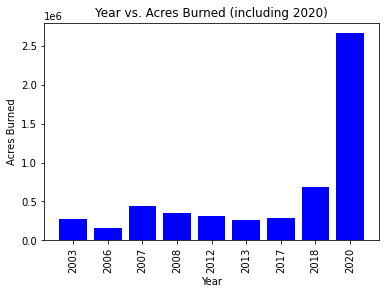

In [25]:
x_axis = grouped_year_acres['year'].astype(str)
y_axis = grouped_year_acres['acres']

# making a bar plot
plt.bar(x_axis, y_axis, color='blue')
plt.xticks(rotation=90)


# giving the name to the x and y label
plt.title('Year vs. Acres Burned (including 2020)')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.savefig('years_vs_acres_30yrs.png')

In [10]:
grouped_year_structures = past_30_years.groupby(['year'])['structures'].sum().reset_index()
grouped_year_structures

,year,structures
0,1999,0
1,2002,17
2,2003,2820
3,2006,11
4,2007,1651
5,2008,58
6,2009,209
7,2012,0
8,2013,112
9,2015,4


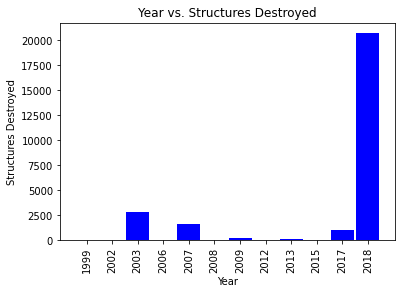

In [11]:
x_axis = grouped_year_structures['year'].astype(str)
y_axis = grouped_year_structures['structures']

# making a scatter plot
plt.bar(x_axis, y_axis,  width=0.90, color='blue')
plt.xticks(rotation=90)

# giving the name to the x and y label
plt.title('Year vs. Structures Destroyed')
plt.xlabel('Year')
plt.ylabel('Structures Destroyed')
plt.savefig('years_vs_structures_30yrs.png')

In [12]:
grouped_year_deaths = past_30_years.groupby(['year'])['deaths'].sum().reset_index()
grouped_year_deaths

,year,deaths
0,1999,0
1,2002,0
2,2003,15
3,2006,0
4,2007,2
5,2008,2
6,2009,2
7,2012,0
8,2013,0
9,2015,0


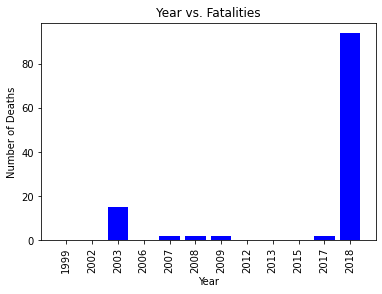

In [13]:
x_axis = grouped_year_deaths['year'].astype(str)
y_axis = grouped_year_deaths['deaths']

#making a bar chart
plt.bar(x_axis, y_axis, color='blue')
plt.xticks(rotation=90)

# giving the name to the x and y label
plt.title('Year vs. Fatalities')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.savefig('years_vs_deaths_30yrs.png')

In [14]:
#sample size not big enough to perform a r-value analysis

# x_axis = past_30_years['acres']
# y_axis = past_30_years['structures']

# plt.scatter(x_axis, y_axis, edgecolors='black')

# plt.title('Acres Burned vs Structures Destroyed')
# plt.xlabel('Acres Burned')
# plt.ylabel('Structures Destroyed')

# correlation = st.pearsonr(x_axis, y_axis)
# correlation
# print(f"The r-value is {round(correlation[0],2)}")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(150000,15000),fontsize=15,color="blue")
# plt.scatter(x_axis, y_axis, edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")
# plt.show()
# plt.savefig('acres_vs_structures_30yrs.png')

In [15]:
#sample size not big enough to perform a r-value analysis

# x_axis = past_30_years['acres']
# y_axis = past_30_years['deaths']

# plt.scatter(x_axis, y_axis, edgecolors='black')

# plt.title('Acres Burned vs Number of Deaths')
# plt.xlabel('Acres Burned')
# plt.ylabel('Number of Deaths')

# deaths_correlation = st.pearsonr(x_axis, y_axis)
# deaths_correlation
# print(f"The r-value is {round(deaths_correlation[0],2)}")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(150000,60),fontsize=15,color="blue")
# plt.scatter(x_axis, y_axis, edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")
# plt.show()
# plt.savefig('acres_vs_deaths_30yrs.png')

In [16]:
#sample size not big enough to perform a r-value analysis

# x_axis = past_30_years['structures']
# y_axis = past_30_years['deaths']

# plt.scatter(x_axis, y_axis, edgecolors='black')

# plt.title('Structures Destroyed vs Number of Deaths')
# plt.xlabel('Structures Destroyed')
# plt.ylabel('Number of Deaths')

# str_correlation = st.pearsonr(x_axis, y_axis)
# str_correlation
# print(f"The r-value is {round(str_correlation[0],2)}")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(0,60),fontsize=15,color="blue")
# plt.scatter(x_axis, y_axis, edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")
# plt.show()
# plt.savefig('structure_vs_deaths_30yrs.png')

In [17]:
#pull value counts for cause of fire
past_30_years['cause'].value_counts()

Human Related          7
Lightning              5
Powerlines             3
Under Investigation    1
Name: cause, dtype: int64

In [15]:
top_20_acres_df['cause'].value_counts()

Under Investigation    6
Human Related          5
Lightning              4
Powerlines             3
Undetermined           1
Lightning              1
Name: cause, dtype: int64

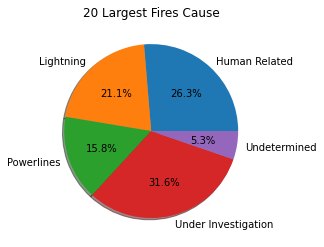

<Figure size 432x288 with 0 Axes>

In [34]:
human_related = top_20_acres_df.loc[top_20_acres_df['cause'] == 'Human Related'].count()[0]
lightning = top_20_acres_df.loc[top_20_acres_df['cause'] == 'Lightning'].count()[0]
powerlines = top_20_acres_df.loc[top_20_acres_df['cause'] == 'Powerlines'].count()[0]
under_investigation = top_20_acres_df.loc[top_20_acres_df['cause'] == 'Under Investigation'].count()[0]
undetermined = top_20_acres_df.loc[top_20_acres_df['cause'] == 'Undetermined'].count()[0]

labels = ['Human Related', 'Lightning', 'Powerlines', 'Under Investigation', 'Undetermined']

plt.title('20 Largest Fires Cause')
plt.pie([human_related, lightning, powerlines, under_investigation, undetermined], labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()
plt.savefig('largest_fires_cause_pie.png')

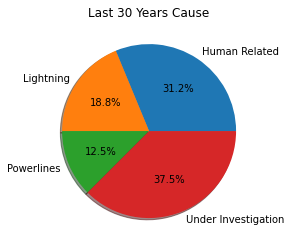

<Figure size 432x288 with 0 Axes>

In [33]:
human_related = past_30_years.loc[past_30_years['cause'] == 'Human Related'].count()[0]
lightning = past_30_years.loc[past_30_years['cause'] == 'Lightning'].count()[0]
powerlines = past_30_years.loc[past_30_years['cause'] == 'Powerlines'].count()[0]
under_investigation = past_30_years.loc[past_30_years['cause'] == 'Under Investigation'].count()[0]

labels = ['Human Related', 'Lightning', 'Powerlines', 'Under Investigation']

plt.title('Last 30 Years Cause')
plt.pie([human_related, lightning, powerlines, under_investigation], labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()
plt.savefig('last_30_years_pie.png')